After finishing my exploration of rotating images, I'm came across the idea of rescaling (also known as sampling) images. I'm curious as to how one would go about rescaling an image at pixel level. I'm going to attempt to upsample and downsample images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_image = cv2.imread("../../images/project3/testimage.pgm")
monkey = cv2.imread("../../images/project3/demo.pgm")

plt.imshow(test_image)
plt.show()

<Figure size 640x480 with 1 Axes>

I think the idea of padding an image is necessary since I'm going to attempt to enlarge the image.

This is the padded image


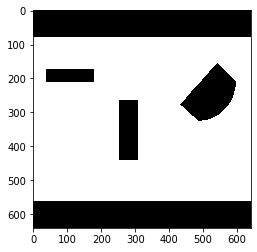

In [2]:
def padImg(img):
    imageWidth = len(img[0])
    imageHeight = len(img)
    if imageWidth > imageHeight:
        paddedImg = cv2.copyMakeBorder(img, int((imageWidth-imageHeight)/2), int((imageWidth-imageHeight)/2), 0, 0, cv2.BORDER_CONSTANT) # top, bottom, left, right
    else:
        paddedImg = cv2.copyMakeBorder(img, 0, 0, int((imageHeight-imageWidth)/2), int((imageHeight-imageWidth)/2), cv2.BORDER_CONSTANT)
    return paddedImg

print('This is the padded image')
plt.imshow(padImg(test_image))
plt.show()

If the scale is 1, then it returns the original image


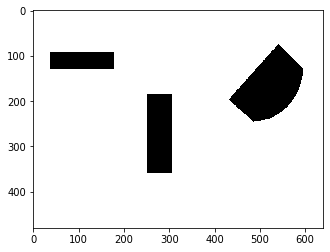

In [3]:
def downsampleImg(img, scale):
    imageWidth = len(img[0])
    imageHeight = len(img)
    paddedimg = padImg(img)
#     print(len(paddedimg[0]))
#     print(len(paddedimg))
    newimg = []
    if scale == 0:
        return img
    else:
        for y in range(0, imageHeight, scale):
            tempimg = []
            for x in range(0, imageWidth, scale):
                tempimg.append(img[y][x])
            newimg.append(tempimg)
        return newimg

print('If the scale is 1, then it returns the original image')
plt.imshow(downsampleImg(test_image, 1))
plt.show()

However, if the scale is anything greater than 1, then you will notice that the scale of the image becomes smaller and the shapes that aren't square or rectangle become noticably more "bloby." In other words, this is causing distortions!

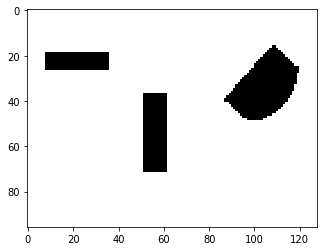

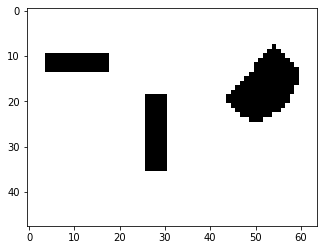

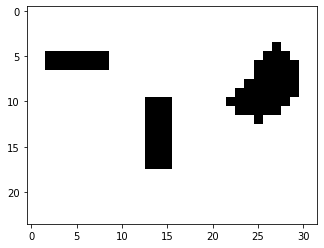

In [4]:
plt.imshow(downsampleImg(test_image, 5))
plt.show()

plt.imshow(downsampleImg(test_image, 10))
plt.show()

plt.imshow(downsampleImg(test_image, 20))
plt.show()

-----Monkey Image-----


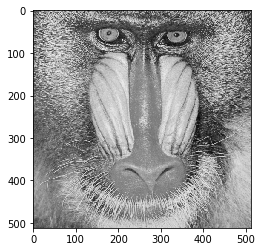

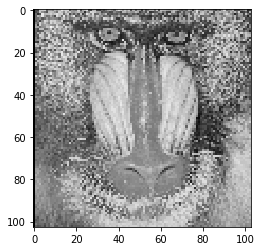

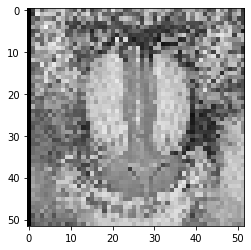

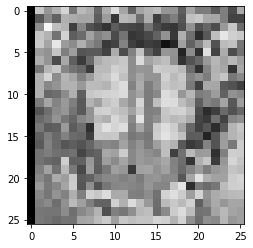

In [5]:
print('-----Monkey Image-----')

plt.imshow(downsampleImg(monkey, 1))
plt.show()

plt.imshow(downsampleImg(monkey, 5))
plt.show()

plt.imshow(downsampleImg(monkey, 10))
plt.show()

plt.imshow(downsampleImg(monkey, 20))
plt.show()

The monkey image even more so convinced me that I'm not actually downsampling it. I'm just distorting the image, which makes sense because in the function, I'm just skipping pixels to append in the image in relation to the scale that's given. Therefore I have to find another way to downsample the image.

(After thinking about the downsampling for 20 minutes...)

Well now that I've given it some more thought, I've realized that I am downsampling the image. It just so happens that when you downsample an image, you also distort it and that makes sense because there's no way to shrink an image without eliminating certain pixels which would cause distortion. Information will be lost when downsampling an image, but that makes me wonder how photo editors are able to make images a smaller dimension without losing clarity in an image...

I think what would have to occur in order to properly downsample an image is by eliminating pixels around the image. That's the best way to go about doing it. So I would have to eliminate neighboring pixels in order to minimize damage in clarity of an image.

In [6]:
def properdownsampleImg(img, scale):
    imageWidth = len(img[0])
    imageHeight = len(img)
    paddedimg = padImg(img)
#     print(len(paddedimg[0]))
#     print(len(paddedimg))
    newimg = []
    if scale == 0:
        return img
    else:
        for y in range(0, imageHeight-1, scale):
            tempimg = []
            for x in range(0, imageWidth-1, scale):
                if img[y][x].any() != img[y][x-1].any():
                    img[y][x-1] = img[y][x]
                elif img[y][x].any() != img[y+1][x-1].any():
                    img[y+1][x-1] = img[y][x]
                elif img[y][x].any() != img[y+1][x].any():
                    img[y+1][x] = img[y][x]
                elif img[y][x].any() != img[y+1][x+1].any():
                    img[y+1][x+1] = img[y][x]
                elif img[y][x].any() != img[y][x+1].any():
                    img[y][x+1] = img[y][x]
                elif img[y][x].any() != img[y-1][x+1].any():
                    img[y-1][x+1] = img[y][x]
                elif img[y][x].any() != img[y-1][x].any():
                    img[y-1][x] = img[y][x]
                elif img[y][x].any() != img[y-1][x-1].any():
                    img[y-1][x-1] = img[y][x]
                else:
                    tempimg.append(img[y][x])
            newimg.append(tempimg)
        return newimg

print('If the scale is 1, then it returns the original image') 
# An error suddenly popped up even though it was working completely fine. I didn't change anything...

# plt.imshow(properdownsampleImg(test_image, 3))
# plt.show()

If the scale is 1, then it returns the original image


My intention with my proper downsample image function is to be able to eliminate neighboring pixels if it's not the same as the pixel that's currently being looked at. With that concept of idea, it should be able to downsample the image without removing clarity of the image. But instead it's turning every pixel into the pixel at the orgin which is white because I'm checking every neighboring pixel 4 times (with the pixels above, below, to the left and right of the current one being looked at). I need to find a way to be able to skip pixels after checking their neighbors so that it doesn't quadrouple check and turn it into the color of the pixel at the origin of the image. 

Of course, with me exploring downsampling, I'm wondering if there's a way to upsample the image. If my idea of how to downsample images is correct, then if I do the opposite of it (adding neighboring pixels around the current pixel) then it should be able enlarge the image.

If the scale is 1, then it returns the original image


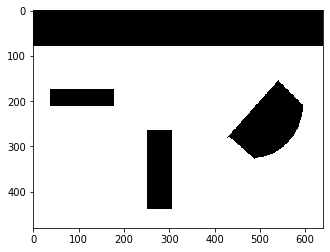

In [7]:
def upsampleImg(img, scale):
    imageWidth = len(img[0])
    imageHeight = len(img)
    paddedimg = padImg(img)
#     print(len(paddedimg[0]))
#     print(len(paddedimg))
    newimg = []
    if scale == 0:
        return img
    else:
        for y in range(0, imageHeight):
            tempimg = []
            for x in range(0, imageWidth):
                tempimg.append(paddedimg[y][x])
            newimg.append(tempimg)
        return newimg

print('If the scale is 1, then it returns the original image')
plt.imshow(upsampleImg(test_image, 1))
plt.show()

### Conclusion

In conclusion, I think this side project was fun. It definitely got me thinking about how exactly photo editors are able to enlarge photos without losing clarity to an image. I also was not expecting for resizing an image to be this difficult because all that's happening is the image is either getting bigger or smaller and I thought that my initial solution to it was the answer, but it distorts it.

I know that there's Python's Image Library (https://www.geeksforgeeks.org/python-pil-image-resize-method/), which gives Python image editing capabilities, but I wanted to figure out if I could do it from scratch or something similar.

I was also expecting for rotating images to be harder than resizing an image, but I am very wrong. I think it's harder to try to implement pixels in an already existing image than to just simply rotate an image. If I had more time, I would probably be able to figure out a correct way to do it.